# COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 02 december 2023


# _Project Title_


_Give names and emails of group members here:_

* Akila Mukunda, mm23a2m@leeds.ac.uk
* Aneeta Cherian,mm23ac@leeds.ac.uk
* Kevin Muller, mm23ktm@leeds.ac.uk
* Pooja Priya Jeyanthi Sethumathavan , mm22ppjs@leeds.ac.uk

# Project Plan

## The Data 

The dataset used in this project was obtained from Kaggle. It contains all the “Top 200” playlists published internationally on Spotify Charts on a daily basis, from January 1st, 2017, to May 29th, 2023. These playlists offer a snapshot of the most popular tracks played globally on a particular day. The dataset comprises approximately 650,000 rows, about 467,800 songs and encompasses 2339 playlists. The dataset contains 20 columns out of which, “Rank” tells the rank of that particular song for the day, “Title” tells the name of the track, “Artists” name the artist behind the song, “Date” tells us the date the playlist was published, “Nationality” marks the nationality of the artist, “Continent” marks the continent the artist is from, “id” identifies the song by a unique indicator, and “Song URL” which provides the Spotify link to the song, are part of the original dataset from Spotify so it can be considered completely accurate. Several other columns have been added to this dataset to include audio features of the songs which were extracted through Spotify’s API such as “Danceability” which describes how suitable a track is for dancing, “Energy” which represents a perceptual measure of intensity, “Loudness” which is the overall loudness of a track in decibels (dB), “Speechiness” which detects the presence of spoken words in a track, “Acousticness” which describes whether a track uses primarily instruments that produce sound through acoustic means, “Instrumentalness” which predicts whether a track contains no vocals, and “Valence” which describes the musical positiveness of a track. This allows for a deeper analysis on how certain auditory factors can contribute to the popularity of a song. Songs are ranked from 1 to 200 and displayed according to their ranks from highest to lowest for a single day. It is expected that songs would appear in the dataset more than once since multiple tracks can stay in the Top 200 playlist for weeks or even months consecutively, or even reappear in the playlist after a long absence. Therefore, the dataset will have some repetition of the same songs, but not necessarily the same rank on different days, thus it is highly unlikely that there will be duplicate rows. This dataset had a usability score of 10 on Kaggle, which meant that it was credible, complete, compatible, and updated frequently and regularly, which influenced our decision in using this dataset for our project.


## Project Aim and Objectives 

The goal of our project is to critically analyze, categorize and visualize features of peak interest in the Spotify Top 200 playlist dataset. We aim to not only imbibe a thorough understanding of this dataset, but also observe trends and form conclusions that matter. With the help of models and various analytical tools, we hope to influence your perception of every-day music, whether you are related to the field of music or not. 

### Specific Objective(s)

Our project can be categorized into 4 sub - objectives as follows :

Objective 1: Gathering trends between the various features of songs and their inter - correlative nature. The dependencies of each feature and its weight of impact on a song’s ranking on the Top 200 playlist. 

Objective 2: "Spotify Wrapped" to show in - depth analytics of Top 200 playlist for any given year (2017 - 2023) provided by the user.

Objective 3: A Classification Model which classifies a new song of given characteristics into a “Hit song” or “Not a hit song”.

Objective 4: Catered playlists - With a particular year and a given array of audio features as input. Recommending Songs Based on Year and Selected Audio Features


## System Design

### Architecture

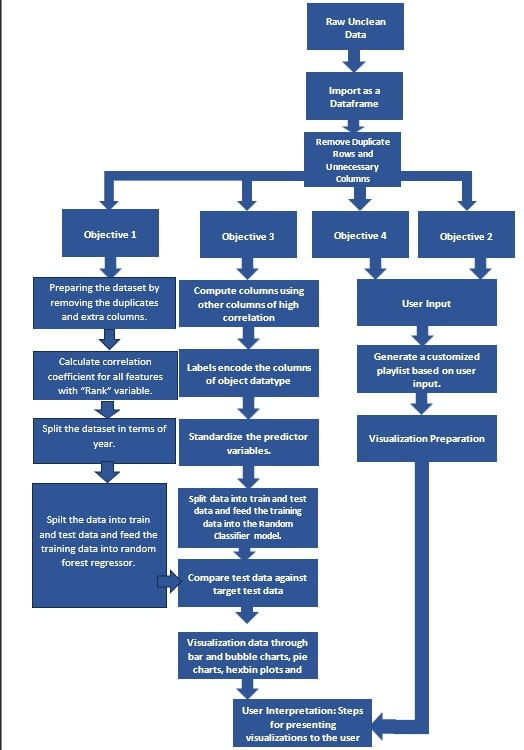


Objectives 1 and 3 deal with modelling and hence start off with the computation of correlations. Objective 1 makes use of Randomforest regressor to compute each attributes’ dependencies on the Rank of a song in the form of likelihood. Objective 3, dealing with RandomForestClassifcation, label-encodes and standardizes the data to prepare it for the model to classify a song as “Hit” or not. Both objectives use training and testing data to measure model accuracies. 

Objectives 2 and 4 on the other hand are analytical in nature and hence receive inputs from the user at the start of their workflow. With the user’s input, both tasks carry out computations whose results are suggestive to the user. Some examples are top songs of the year, songs suggested based on genre, catered playlists and more.

All 4 tasks end their workflow with a visualization as much as deemed necessary by the task
 
### Processing Modules and Algorithms


The most significant computational components and algorithms that were used in this project include:

* Cleaning the data – In objective 1 and 4, this was done by removing columns unnecessary to this project, such as "# of Artist","Artist (Ind.)","# of Nationality", "Points (Total)"and "Points (Ind for each Artist/Nat)" to streamline the dataset and focus on essential attributes. The dataset also repeats the same song as many times as the number of artists involved in the track. For example, if a track features three artists, the song is repeated three times with all columns remaining the same, except "Artist (Ind.)" which will have the name of the individual artist’s name. Thus, duplicate entries were also removed. In objective 4, the "Date" column was converted to a datetime format, facilitating temporal analysis and filtering based on the selected year.



* Analysis – In objective 2, filters were applied to the songs based on popularity and a feature provided by the user to analyze whether a song had High, Medium, or Low popularity, against the feature categorized in the same way. A pivot table summarized the distribution of these songs based on this category, and a heatmap was used to visualize this distribution. In objective 4, a correlation matrix was computed for the selected audio attributes in the custom playlist. The matrix helps identify relationships and dependencies between attributes, offering insights into the playlists overall audio profile.




* Constructing special data structures - A random forest classifier is used in objective 3. It considers many decision trees which each contain a specific instance of the data. The random forest technique goes through each of the instances, taking the one with the majority of votes as the selected prediction. Similarly, in objective 1, a Random Forest Regressor was used to understand which audio features had a strong impact in predicting the song ranking. It also utilizes label encoding to convert object oriented data into numerical form. It does so by assigning a unique numerical value to each unique object. Additionally it uses train_test_split, which is a powerful tool that splits up the data into training and test data with just a single command. The training data is fed into the model to be learnt and the test data is used to check the accuracy of the model. This was also done in objective 1 to check the mean squared error and accuracy of the data.


# Program Code

## Objective 1

We import the necessary modules and libraries for our model. 

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import os

Loading the file and getting a sense of the data set


In [2]:
cas_2= pd.read_csv("Spotify_Dataset_V3.csv",delimiter=";")
print(cas_2)

        Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
4          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
...      ...                            ...                         ...   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   
651935   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023

Preparing the dataset by removing the unnecessary columns

In [3]:
cs2 = cas_2.drop(["# of Artist","# of Nationality", "Points (Total)","Points (Ind for each Artist/Nat)",],axis=1)
print(cs2)


        Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
4          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
...      ...                            ...                         ...   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   
651935   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023

We are removing the duplicate rows from the data set by specifying the column name to identify the duplicates. We're reseting the index once the duplicates have been eliminated.

In [4]:
col_name= ['Rank', 'Title', 'Artists', 'Date']
csd2 = cs2.drop_duplicates(col_name)
csd2 = csd2.reset_index(drop=True)
# Print the result
print(csd2)

        Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
470431   196                  White Iverson                 Post Malone   
470432   197                        Oh Lord                   MiC LOWRY   
470433   198  Superstition - Single Version               Stevie Wonder   
470434   199                        Secrets                  The Weeknd   
470435   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023

Now we're pre-processing the data 
* we check the total number of columns and rows in the dataset.
* Checking the total number of columns and rows after dropping some of the columns 
* checking for the null value
* returns the description of the data and information of the data
* checking for duplicated values.

In [5]:
shp1 = cs2.shape
shp2 = csd2.shape
null_1= csd2.isnull().sum()
des1 = csd2.describe()
info1 = csd2.info()
print(des1)
print(info1)
print("shape of original dataset:",shp1)
print("shape of modified dataset:",shp2)
print("Total Null values in the dataset",null_1)
dup1 = csd2.duplicated().sum()
print("duplicated values:", dup1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470436 entries, 0 to 470435
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Rank              470436 non-null  int64  
 1   Title             470436 non-null  object 
 2   Artists           470436 non-null  object 
 3   Date              470436 non-null  object 
 4   Danceability      470436 non-null  float64
 5   Energy            470436 non-null  float64
 6   Loudness          470436 non-null  float64
 7   Speechiness       470436 non-null  float64
 8   Acousticness      470436 non-null  float64
 9   Instrumentalness  470436 non-null  float64
 10  Valence           470436 non-null  float64
 11  Artist (Ind.)     470436 non-null  object 
 12  Nationality       470436 non-null  object 
 13  Continent         470436 non-null  object 
 14  id                470436 non-null  object 
 15  Song URL          470436 non-null  object 
dtypes: float64(7), int64

The values of the "Rank" column and several musical features such as danceability, energy, loudness ,speechiness,Acousticness and valence are placed into distinct variables. Next, we compute the correlation coefficient by using the "corrcoef" function in Numpy. 
The correlation coefficent, which ranges from -1(Negative correlation) to 1(positive correlation) indicates the strength of a linear relationship between two varaibles. 

In [6]:
#calculating correlation coefficient for all features with rank. 
#The correlation coefficient gives a preliminary understanding of the relationships between individual features and the rank.
x0 = csd2['Rank'].values
y0 = csd2['Danceability'].values

c1 = np.corrcoef(x0,y0)[0,1]
print("correlation coefficient between danceability and rank:",c1)

x1 = csd2['Rank'].values
y1 = csd2['Energy'].values

c2 = np.corrcoef(x1,y1)[0,1]
print("correlation coefficient between Energy and rank:", c2)

x2 = csd2['Rank'].values
y2 = csd2['Loudness'].values

c3 = np.corrcoef(x2,y2)[0,1]
print("correlation coefficient between Loudness and rank:", c3)

x3 = csd2['Rank'].values
y3 = csd2['Speechiness'].values

c4 = np.corrcoef(x3,y3)[0,1]
print("correlation coefficient between speechiness and rank:", c4)
x4 = csd2['Rank'].values
y4 = csd2['Acousticness'].values

c5 = np.corrcoef(x4,y4)[0,1]
print("correlation coefficient between Acousticness and rank:", c5)

x5 = csd2['Rank'].values
y5 = csd2['Valence'].values

c6 = np.corrcoef(x5,y5)[0,1]
print("correlation coefficient between Valence and rank:", c6)


correlation coefficient between danceability and rank: -0.05607410664708776
correlation coefficient between Energy and rank: -0.010272327828857003
correlation coefficient between Loudness and rank: -0.029034362271168287
correlation coefficient between speechiness and rank: 0.006261342220217604
correlation coefficient between Acousticness and rank: 0.023772860577699277
correlation coefficient between Valence and rank: -0.025823906811119374



Explanation of results we got in the above cell:
* displaying an very weak negative correlation
* Indicating a extremely weak negative correlation
* Indicating a extermely weak negative correlation
* showing a extremely weak positive correlation 
* showing a slightly positive correlation in comparison to others
* indicating a weak negative correlation


Prior to doing the random forest regressor, we verify the names of the columns. 

In [7]:
print(csd2.columns)


Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', 'Artist (Ind.)', 'Nationality', 'Continent', 'id',
       'Song URL'],
      dtype='object')


We're making a copy of Our modified dataset, to make sure we don't mess up our originial modified dataset
Then we split the dataset in terms of year


In [8]:
ccs2 = csd2.copy()
ccs2['Date'] = pd.to_datetime(ccs2['Date'],format='%d/%m/%Y', errors='coerce')
ccs2['Year'] = ccs2['Date'].dt.year
yearwise = {}
for year in ccs2['Year'].unique():
    yearwise[year] = ccs2[ccs2['Year'] == year].copy()


* Now we're creating two varaibles, audio_features and target_varaibles.
* let's split the data into training and testing sets, to train the model in the ratio of 80:20
* Now to use the random forest regressor, we're standardizing the feature varaiable, after that we're feeding the data into the regressor model. 
* To evaluate the Model performance using Mean Squared error
* MSE is used to assess how well the model predicts the ranking of songs based on audio features
* We are trying to analyse song's feature importance from the model. If a feature has the highest feature importance , it suggest that songs with higher danceability are more likely to rank in top 50 or 200.
* The higher the feature importance , then it's more likely to rank in top 50.


Year 2023 - Mean Squared Error: 913.90
Year 2023 - Model Accuracy: 0.73


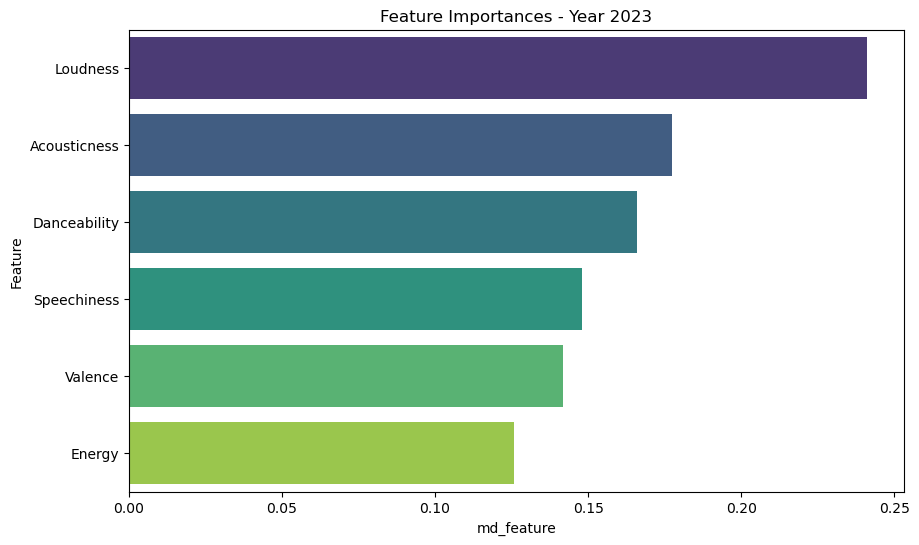

Year 2022 - Mean Squared Error: 1475.01
Year 2022 - Model Accuracy: 0.56


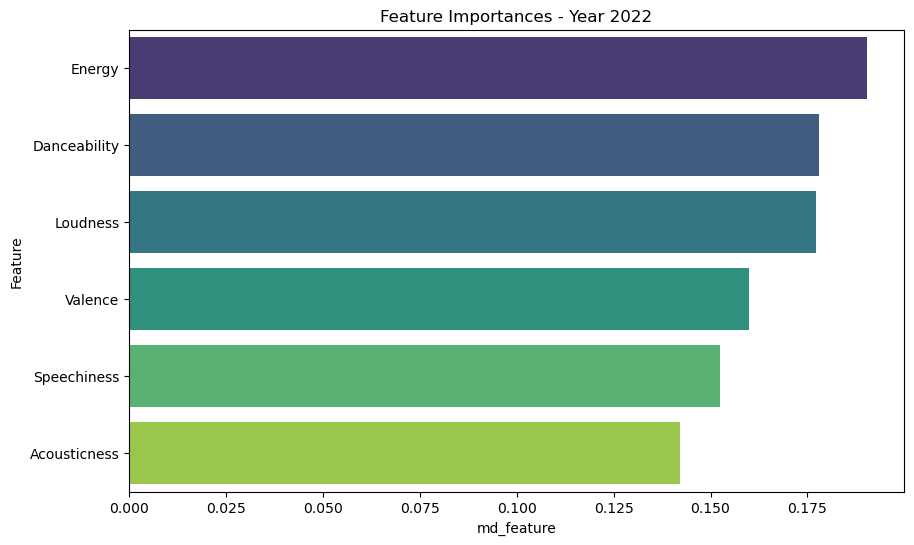

Year 2021 - Mean Squared Error: 1402.84
Year 2021 - Model Accuracy: 0.57


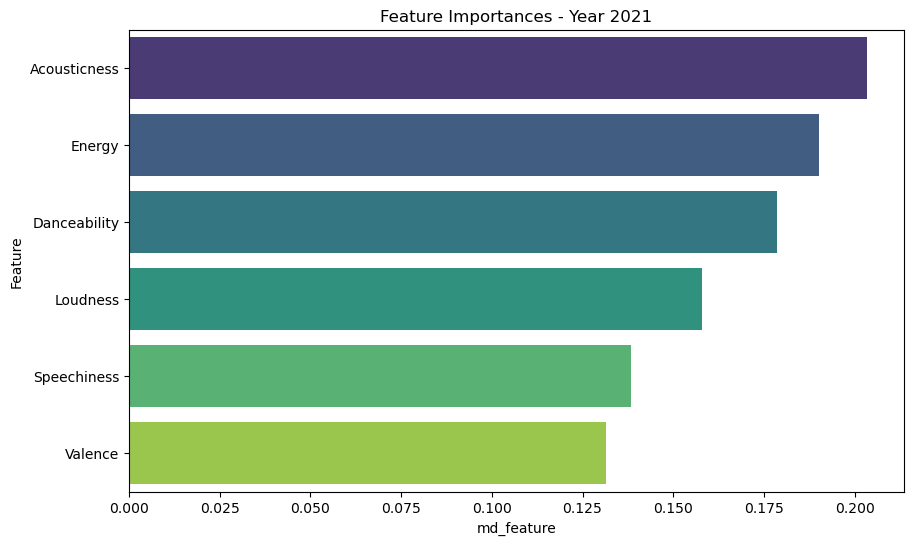

Year 2020 - Mean Squared Error: 1454.57
Year 2020 - Model Accuracy: 0.56


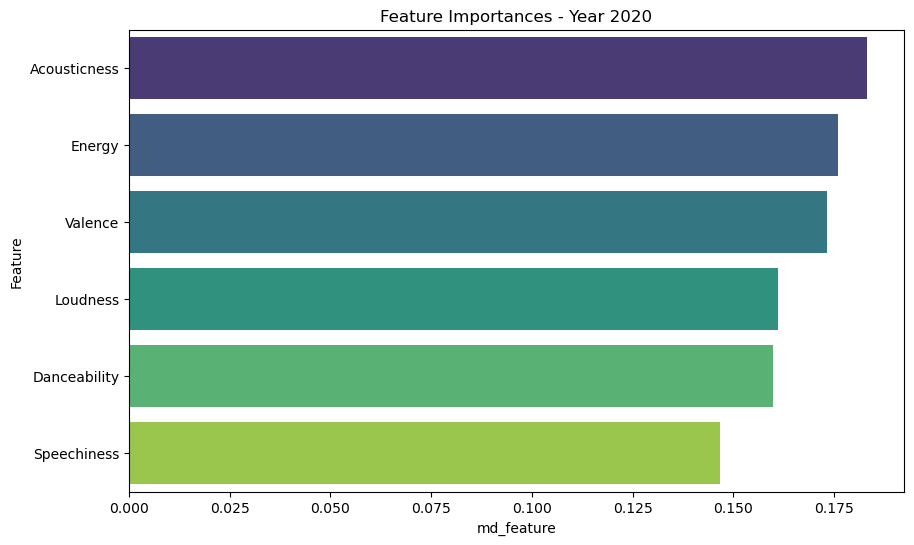

Year 2019 - Mean Squared Error: 1501.20
Year 2019 - Model Accuracy: 0.55


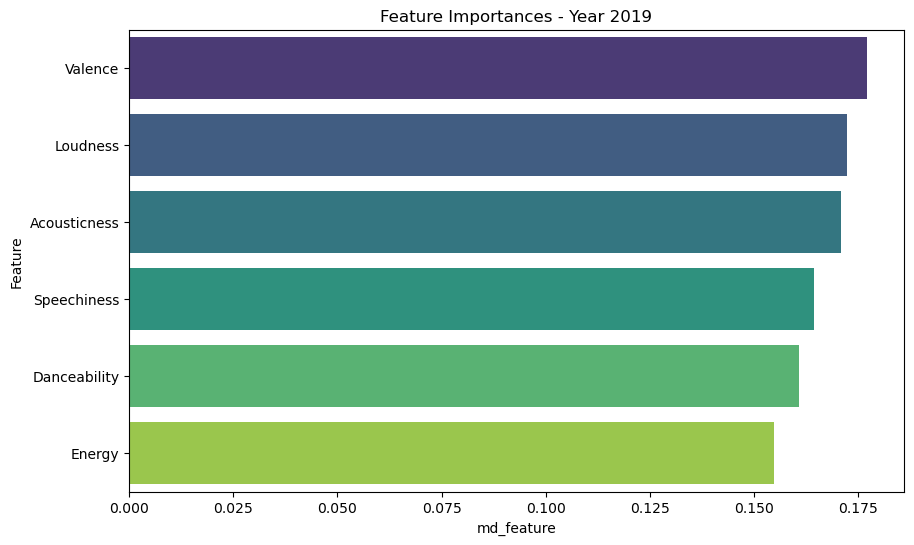

Year 2018 - Mean Squared Error: 1534.97
Year 2018 - Model Accuracy: 0.54


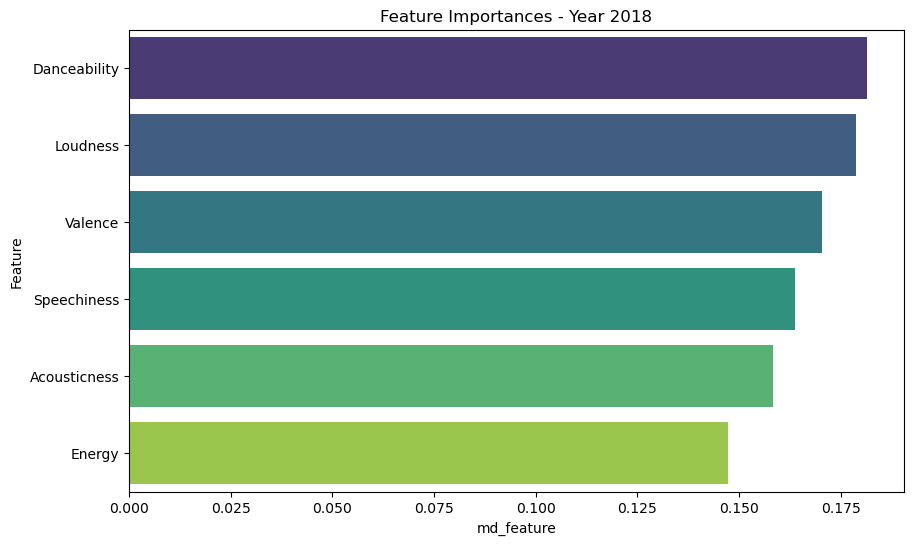

Year 2017 - Mean Squared Error: 1594.22
Year 2017 - Model Accuracy: 0.52


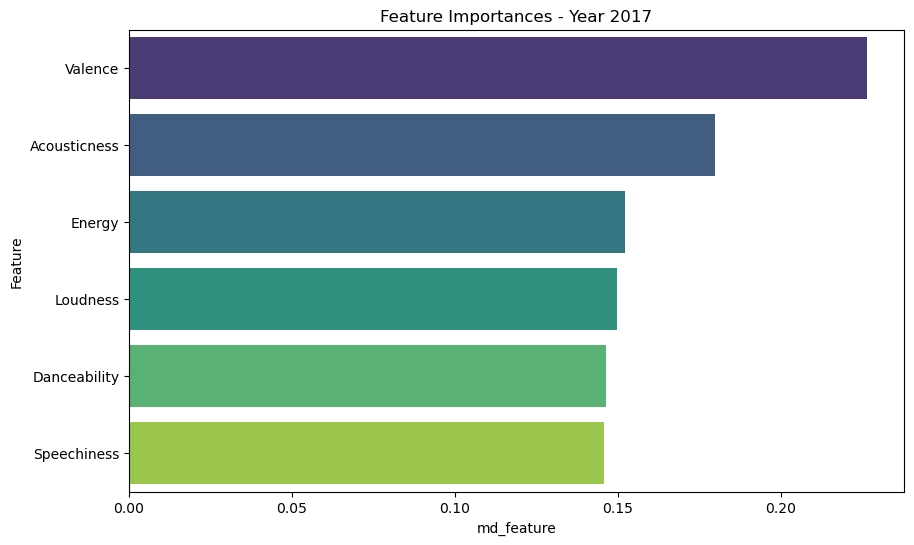

mean: 99.79168736679456
stdandard dev: 42.524298442553444
minimum: 1.1732160609351212
maximum: 194.0447398989899


In [9]:
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence']
target_variable = 'Rank'
for year, every_year in yearwise.items():

    cs1 = every_year[audio_features]
    cs2 = every_year[target_variable]
    csx_train, csx_test, csy_train, csy_test = train_test_split(cs1, cs2, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    csx_train_scaled = scaler.fit_transform(csx_train)
    csx_test_scaled = scaler.transform(csx_test)
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(csx_train_scaled, csy_train)

    # Make predictions on the test set
    csy_predct = regressor.predict(csx_test_scaled)
    mse = mean_squared_error(csy_test, csy_predct)
    print(f"Year {year} - Mean Squared Error: {mse:.2f}")
    accuracy= regressor.score(csx_test_scaled,csy_test)
    print(f"Year {year} - Model Accuracy: {accuracy:.2f}")
    
    model_feature = regressor.feature_importances_
    find_feature = pd.DataFrame({'Feature': audio_features, 'md_feature': model_feature})
    find_feature = find_feature.sort_values(by='md_feature', ascending=False)
    # we are trying to identifies pattern in data using visulization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='md_feature', y='Feature', data=find_feature, palette='viridis')
    plt.title(f'Feature Importances - Year {year}')
    plt.show()
    
    mean_value = np.mean(csy_predct)
    std_value = np.std(csy_predct)
    min_value = np.min(csy_predct)
    max_value = np.max(csy_predct)
print("mean:",mean_value)
print("stdandard dev:",std_value)
print("minimum:",min_value)
print("maximum:",max_value)

* The model's performance varies significantly every year, and at the year of 2023 we achieved the model accuracy of 73%
* We can compare these statistics with the actual ranking statstics to assess how well you model aligns with the observed data.


# Objective 2

Importing modules and dropping unnecessary columns:

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
f=pd.read_csv("Spotify_Dataset_V3A.csv",delimiter=";")
f1=f.drop(["# of Artist","Artist (Ind.)","# of Nationality", "Points (Total)","Points (Ind for each Artist/Nat)",],axis=1)
l=f1.values.tolist()
list_year=[]


Asking the user for input:


In [28]:
flag=0
while flag==0:
    year=str(input("Enter the year you want a Spotify Wrapped for (2017-2023):"))
    if year in ["2017","2018","2019","2020","2021","2022","2023"]:
        flag=1
    else:
        print("Enter the year correctly!")
        continue
flag=0
while flag==0:
    feature=str(input("Enter the feature you want a Spotify Wrapped for (Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence):"))
    if feature in ["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Valence"]:
        flag=1
    else:
        print("Enter the feature correctly!")
        continue

Enter the year you want a Spotify Wrapped for (2017-2023):2020
Enter the feature you want a Spotify Wrapped for (Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence):Energy


Sorting the entries by year based on user's input:


In [30]:
for i in range(0,len(l)):
    if l[i][3][6:10]==year:
        list_year.append(l[i])
global list_frame
list_frame=pd.DataFrame(list_year,columns=["Rank","Title","Artists","Date","Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Valence","Nationality","Continent","id","Song URL"])

Dropping duplicate entries of songs based on rank and title:




In [31]:
list_frame=list_frame.drop_duplicates(subset=["Rank","Title","Artists","Date"])
print()

Most listened to songs of the year:

In the code cell below, we are creating a dataframe that counts how many days a song has been in the Top 200 that year. Since it is in descending order, .head(10) should give the top 10 songs of that year. 

In [32]:
maxsongs_frame=list_frame[["Title","Artists"]].value_counts().reset_index(name="Days in Top 200").head(10)
def songs():
    songoftheyear=maxsongs_frame.loc[0].at["Title"] #Gives the most popular song of the year
    print("Most listened to song(s) of the year: ",end="")
    maxdays=maxsongs_frame.values.tolist()[0][2] #Tells how long the most popular song stayed in the Top 200
    count=0
    for i in maxsongs_frame.values.tolist(): #Includes all songs that stayed in the Top 200 as long as the most popular song
        if count==0:
            print(i[0],"by",i[1],end="")
            count+=1
            continue
        if i[2]==maxdays:
            count+=1
            print(" and",i[0],"by",i[1],end="")
    print(" which stayed in the Top 200 playlist for",maxdays,"days")  
    display(maxsongs_frame) #Displays the final list
songs()


Most listened to song(s) of the year: Watermelon Sugar by Harry Styles and Dance Monkey by Tones And I and Someone You Loved by Lewis Capaldi and Blinding Lights by The Weeknd and Roses - Imanbek Remix by SAINt JHN, Imanbek and Don't Start Now by Dua Lipa which stayed in the Top 200 playlist for 366 days


,Title,Artists,Days in Top 200
0,Watermelon Sugar,Harry Styles,366
1,Dance Monkey,Tones And I,366
2,Someone You Loved,Lewis Capaldi,366
3,Blinding Lights,The Weeknd,366
4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",366
5,Don't Start Now,Dua Lipa,366
6,The Box,Roddy Ricch,365
7,Tusa,"KAROL G, Nicki Minaj",365
8,Before You Go,Lewis Capaldi,365
9,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",365


Most listened to artists of the year:

In the code cell below, we are creating a dataframe that counts how many days an artist appeared in the Top 200 that year for solo tracks alone. Since it is in descending order, .head(10) should give the top 10 artists of that year. 


In [33]:
maxartists_frame=list_frame["Artists"].value_counts().reset_index(name="Times a Solo Track was in the Top 200").head(10)
def artists():
    print("Most listened to artist(s) of the year: ",end="")
    maxtimes=maxartists_frame.values.tolist()[0][1] #The longest an artist stayed in the Top 200 that year
    count=0
    for i in maxartists_frame.values.tolist(): 
        if count==0:
            print(i[0],end="")
            count+=1
            continue
        if i[1]==maxtimes: #Includes all artists that stayed in the Top 200 as long as the most popular artist
            count+=1
            print(" and",i[0],end="")
    print(" who appeared in the Top 200 playlist ",maxtimes,"times")
    display(maxartists_frame) #Displays the final list
artists()

Most listened to artist(s) of the year: Juice WRLD who appeared in the Top 200 playlist  2201 times


,index,Times a Solo Track was in the Top 200
0,Juice WRLD,2201
1,Billie Eilish,1653
2,Ed Sheeran,1554
3,Harry Styles,1313
4,Post Malone,1313
5,Pop Smoke,1285
6,Travis Scott,1264
7,Ariana Grande,1176
8,Bad Bunny,1142
9,The Weeknd,1057


Playlist based on high popularity and high level of feature provided by user:

In [34]:
popularity_frame=list_frame[["Title","Artists","Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Valence"]].value_counts().reset_index(name="Days in Top 200")
#Values were calculated by using the min and max values of each feature from list_frame.describe() 
#and splitting it into three equal intervals
def dance_filter(dance): 
    if dance<=0.407:
        return "Low" 
    if dance>0.407 and dance<=0.689:
        return "Medium"
    if dance>0.689:
        return "High"
def popularity_filter(popular): 
    if popular<=120:
        return "Low"
    if popular>120 and popular<=240:
        return "Medium"
    if popular>240:
        return "High"
def valence_filter(valence): 
    if valence<=0.352:
        return "Low"
    if valence>0.352 and valence<=0.667:
        return "Medium"
    if valence>0.667:
        return "High"
def energy_filter(energy):
    if energy<=0.353:
        return "Low"
    if energy>0.353 and energy<=0.674:
        return "Medium"
    if energy>0.674:
        return "High"
def loudness_filter(loudness):
    if loudness<=-15507.67:
        return "Low"
    if loudness>-15507.67 and loudness<=-5490.33:
        return "Medium"
    if loudness>5490.33:
        return "High"
def speechiness_filter(speechiness):
    if speechiness<=0.3133:
        return "Low"
    if speechiness>0.3133 and speechiness<=0.6037:
        return "Medium"
    if speechiness>0.6037:
        return "High"
def acousticness_filter(acoustic):
    if acoustic<=0.3313:
        return "Low"
    if acoustic>0.3313 and acoustic<=0.6627:
        return "Medium"
    if acoustic>0.6627:
        return "High"
def instrumentalness_filter(instrument):
    if instrument<=0.317:
        return "Low"
    if instrument>0.317 and instrument<=0.636:
        return "Medium"
    if instrument>0.636:
        return "High"


In [35]:
def popular_playlist():
    #Applying the filters function to "Feature" and "Popularity" columns: 
    popularity_frame["Popularity"] = popularity_frame["Days in Top 200"].apply(popularity_filter)
    if feature=="Danceability":
        popularity_frame["Danceability_Category"] = popularity_frame["Danceability"].apply(dance_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Danceability_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Danceability_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Energy":
        popularity_frame["Energy_Category"] = popularity_frame["Energy"].apply(energy_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Energy_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Energy_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Loudness":
        popularity_frame["Loudness_Category"] = popularity_frame["Loudness"].apply(loudness_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Loudness_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Loudness_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Speechiness":
        popularity_frame["Speechiness_Category"] = popularity_frame["Speechiness"].apply(speechiness_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Speechiness_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Speechiness_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Acousticness":
        popularity_frame["Acousticness_Category"] = popularity_frame["Acousticness"].apply(acousticness_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Acousticness_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Acousticness_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Instrumentalness":
        popularity_frame["Instrumentalness_Category"] = popularity_frame["Instrumentalness"].apply(instrumentalness_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Instrumentalness_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Instrumentalness_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    if feature=="Valence":
        popularity_frame["Valence_Category"] = popularity_frame["Valence"].apply(valence_filter)
        #Creating a dataframe with only popularity and feature:
        popularity_pivot = popularity_frame.pivot_table(index="Popularity", columns="Valence_Category",aggfunc="size",fill_value=0)
        print("Here's how the popularity of songs from this year is distributed based on",feature,":")
        display(popularity_pivot)
        popular_playlist=popularity_frame.loc[(popularity_frame["Popularity"]=="High") & (popularity_frame["Valence_Category"]=="High")]
        print("Here's your curated playlist with the most popular songs from this year with high",feature,":")
        display(popular_playlist[["Title","Artists"]].style.hide())
    global v
    v=popularity_pivot
popular_playlist()


Here's how the popularity of songs from this year is distributed based on Energy :


Energy_Category,High,Low,Medium
Popularity,,,
High,23,9,35
Low,705,110,910
Medium,53,5,70


Here's your curated playlist with the most popular songs from this year with high Energy :


Title,Artists
Watermelon Sugar,Harry Styles
Tusa,"KAROL G, Nicki Minaj"
Robbery,Juice WRLD
Circles,Post Malone
goosebumps,Travis Scott
Believer,Imagine Dragons
Adore You,Harry Styles
SICKO MODE,Travis Scott
Ride It,Regard
Godzilla (feat. Juice WRLD),"Eminem, Juice WRLD"


# Objective 3

We start off by importing the modules required for this step of classification modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

Our dataset is crumpled up into multiple rows but only one column delimited by semicolons. We hence import our dataset by specifying the same


In [2]:
f=pd.read_csv("Spotify_Dataset_V3K.csv",delimiter=";") 
df = f
df.head(20) #displays first 20 elements of df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.00,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.00,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.00,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.00,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.00,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
5,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.00,0.033,0.435,0.000,0.726,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
6,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.00,0.047,0.228,0.000,0.562,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...
7,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.00,0.047,0.228,0.000,0.562,Artist 2,Bad Bunny,Nationality 2,Puerto Rico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...
8,6,Flowers,Miley Cyrus,29/05/2023,0.707,0.681,-4325.00,0.067,0.063,0.000,0.646,Artist 1,Miley Cyrus,Nationality 1,United States,Anglo-America,195,195.0,4DHcnVTT87F0zZhRPYmZ3B,https://open.spotify.com/track/4DHcnVTT87F0zZh...
9,7,Daylight,David Kushner,29/05/2023,0.508,0.430,-9475.00,0.034,0.830,0.000,0.324,Artist 1,David Kushner,Nationality 1,United States,Anglo-America,194,194.0,1odExI7RdWc4BT515LTAwj,https://open.spotify.com/track/1odExI7RdWc4BT5...


Dropping unnecessary columns


In [3]:
df = df.drop(["# of Artist","# of Nationality","Points (Total)","Points (Ind for each Artist/Nat)","Artist (Ind.)",],axis=1) 

Checking the datatypes and lengths of columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Rank              651936 non-null  int64  
 1   Title             651936 non-null  object 
 2   Artists           651936 non-null  object 
 3   Date              651936 non-null  object 
 4   Danceability      651936 non-null  float64
 5   Energy            651936 non-null  float64
 6   Loudness          651936 non-null  float64
 7   Speechiness       651936 non-null  float64
 8   Acousticness      651936 non-null  float64
 9   Instrumentalness  651936 non-null  float64
 10  Valence           651936 non-null  float64
 11  Nationality       651936 non-null  object 
 12  Continent         651936 non-null  object 
 13  id                651936 non-null  object 
 14  Song URL          651936 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 74.6+ MB


Checking for null values


In [5]:
df.isnull().sum()

Rank                0
Title               0
Artists             0
Date                0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
Nationality         0
Continent           0
id                  0
Song URL            0
dtype: int64

Checking for NaN values

In [6]:
df.isna().sum()

Rank                0
Title               0
Artists             0
Date                0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
Nationality         0
Continent           0
id                  0
Song URL            0
dtype: int64

Getting a feel of the dataset

In [7]:
df.describe(include='all')

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL
count,651936.000000,651936,651936,651936,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936,651936,651936,651936
unique,NaN,7457,2928,2336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,7,9161,9161
top,NaN,Sunflower - Spider-Man: Into the Spider-Verse,Ed Sheeran,19/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Anglo-America,6RUKPb4LETWmmr3iAEQktW,https://open.spotify.com/track/6RUKPb4LETWmmr3...
freq,NaN,3262,12289,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274804,317892,2602,2602
mean,100.407782,NaN,NaN,NaN,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,NaN,NaN,NaN,NaN
std,57.406664,NaN,NaN,NaN,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,NaN,NaN,NaN,NaN
25%,51.000000,NaN,NaN,NaN,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,NaN,NaN,NaN,NaN
50%,100.000000,NaN,NaN,NaN,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,NaN,NaN,NaN,NaN
75%,150.000000,NaN,NaN,NaN,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,NaN,NaN,NaN,NaN


Removing rows with duplicate "Date" and "ID" as they contain songs of same rank but only a different artist, which is not necessary for our analysis

In [8]:
df=df.drop_duplicates(subset=["Date","id"])

Here, we calculate features such as Max Rank, Min Rank and Average Rank of each song. We also find the duration of each song on the Top 200 Spotify playlist by computing each song's first and last date on the playlist


In [9]:
ans = [[] for _ in range(6)] #this cell takes about 1.5 minutes to run
for x in df.loc[:,"id"].unique():
    l=df[df["id"]==x][["Date","Rank"]]
    ans[0].append(list(l["Date"])[-1])
    ans[1].append(list(l["Date"])[0])
    ans[5].append(len(l.index))
    ans[2].append(min(list(l["Rank"])))
    ans[3].append(max(list(l["Rank"])))
    ans[4].append(sum(list(l["Rank"]))/len(l.index))

Now that we have computed the dates, we can drop every copy of each song on different dates as they are meaningless to us


In [10]:
df = df.drop_duplicates(subset=["id"], keep='first')
print(df)

        Rank                                Title                     Artists  \
0          1                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                       WHERE SHE GOES                   Bad Bunny   
3          3                      La Bebe - Remix       Yng Lvcas, Peso Pluma   
5          4                    Cupid - Twin Ver.                 FIFTY FIFTY   
6          5                            un x100to   Grupo Frontera, Bad Bunny   
...      ...                                  ...                         ...   
651918   184                                 Bobo                    J Balvin   
651919   185              Stay (feat. Maty Noyes)                        Kygo   
651921   187  Purple Lamborghini (with Rick Ross)                    Skrillex   
651926   192                         Paper Planes                      M.I.A.   
651934   200                      Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceab

We now add the previously calculated columns to our dataframe

In [11]:
df = df.assign(Start_Date = ans[0])#Adding 6 more columns
df = df.assign(Last_Date = ans[1])
df = df.assign(MaxRank = ans[2])
df = df.assign(MinRank = ans[3])
df = df.assign(AvgRank = ans[4])
df = df.assign(DaysinTop200 = ans[5])

We drop columns that were useful for calculating the Dates and Ranks, but are unnecessary now

In [12]:
df = df.drop(["Rank","Title", "Artists","Date","id","Song URL",],axis=1)
df

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200
0,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,28/04/2023,29/05/2023,1,2,1.468750,32
2,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,19/05/2023,29/05/2023,1,4,2.090909,11
3,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,18/03/2023,29/05/2023,2,126,11.876712,73
5,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,01/04/2023,29/05/2023,3,25,7.474576,59
6,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,17/04/2023,29/05/2023,1,5,1.953488,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651918,0.729,0.888,-2864.0,0.122,0.117,0.000,0.800,Colombia,Latin-America,01/01/2017,01/01/2017,184,184,184.000000,1
651919,0.648,0.736,-7948.0,0.039,0.044,0.000,0.378,Norway,Europe,01/01/2017,01/01/2017,185,185,185.000000,1
651921,0.457,0.899,-2591.0,0.132,0.002,0.000,0.298,United States,Anglo-America,01/01/2017,01/01/2017,187,187,187.000000,1
651926,0.447,0.848,-6175.0,0.222,0.033,0.000,0.485,United Kingdom,Europe,01/01/2017,01/01/2017,192,192,192.000000,1


We use df.describe() to check the 75th quartile of the column "DaysinTop200", this value will be the threshold for whether a song is a "Hit song" or "Not a hit song"

In [13]:
df.describe(include='all')

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200
count,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161,9161,9161,9161,9161.000000,9161.000000,9161.000000,9161.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,7,1639,2143,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Anglo-America,01/01/2017,29/05/2023,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4679,5243,200,200,NaN,NaN,NaN,NaN
mean,0.674146,0.636076,-5817.697556,0.128299,0.234024,0.013770,0.486465,NaN,NaN,NaN,NaN,87.258160,170.846851,125.433922,50.983626
std,0.147904,0.170402,3146.007010,0.117881,0.248563,0.082544,0.226281,NaN,NaN,NaN,NaN,58.544799,40.791054,43.222555,120.342609
min,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000
25%,0.581000,0.532000,-7397.000000,0.044000,0.040000,0.000000,0.310000,NaN,NaN,NaN,NaN,35.000000,161.000000,96.428571,2.000000
50%,0.691000,0.651000,-5741.000000,0.076000,0.139000,0.000000,0.482000,NaN,NaN,NaN,NaN,81.000000,189.000000,128.388021,8.000000
75%,0.782000,0.761000,-4207.000000,0.180000,0.351000,0.000000,0.660000,NaN,NaN,NaN,NaN,135.000000,198.000000,159.000000,44.000000


We create a new column called "HitorNot" to hold "Yes" and "No" values based on the value in "DaysinTop200". This is our target variable for classification

In [14]:
l = []
for i,row in df.iterrows():
    if row['DaysinTop200']>44:
        l.append("Yes")
    else:
        l.append("No")
df = df.assign(HitorNot = l)

With that step we have completed manipulating the data for our particular use case. Now, we prepare the data for modelling

Our classification model cannot understand String data. With the help of a label encoder, we assign different numerical values to each unique string

In [15]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
df['Nationality'] = labelenc.fit_transform(df['Nationality'])
df['Continent'] = labelenc.fit_transform(df['Continent'])
df['Start_Date'] = labelenc.fit_transform(df['Start_Date'])
df['Last_Date'] = labelenc.fit_transform(df['Last_Date'])
df['HitorNot'] = labelenc.fit_transform(df['HitorNot'])
df.iloc[:10,:]

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200,HitorNot
0,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,36,4,1487,2007,1,2,1.468750,32,0
2,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,48,4,1010,2007,1,4,2.090909,11,0
3,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,36,4,943,2007,2,126,11.876712,73,1
5,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,53,2,18,2007,3,25,7.474576,59,1
6,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,36,4,894,2007,1,5,1.953488,43,0
8,0.707,0.681,-4325.0,0.067,0.063,0.000,0.646,63,1,504,2007,1,9,3.148148,81,1
9,0.508,0.430,-9475.0,0.034,0.830,0.000,0.324,63,1,730,2007,4,11,7.000000,46,1
10,0.644,0.735,-5747.0,0.039,0.052,0.144,0.418,63,1,488,2007,1,29,4.156977,172,1
11,0.520,0.731,-5338.0,0.056,0.342,0.001,0.662,62,3,1058,2007,1,51,5.506667,375,1
12,0.720,0.630,-3547.0,0.277,0.673,0.000,0.607,12,4,1250,2007,1,14,5.431579,95,1


All our elements are now numerical
Now, we standardize each column so that high or low numeric values don't sway the classifer in the wrong direction


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
y = df.loc[:,'HitorNot']
x = df.drop(columns=['HitorNot','DaysinTop200','Start_Date','Last_Date'],inplace = False)
mms = MinMaxScaler()
ss = StandardScaler()
x = ss.fit_transform(x)
x = mms.fit_transform(x)
x = pd.DataFrame(x, columns=df.drop(columns=['HitorNot','DaysinTop200','Start_Date','Last_Date']).columns)
x

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,MaxRank,MinRank,AvgRank
0,0.652412,0.759839,0.814223,0.011653,0.485915,0.00000,0.845188,0.553846,0.666667,0.000000,0.005025,0.002356
1,0.634868,0.802220,0.846376,0.041314,0.143863,0.65795,0.217573,0.738462,0.666667,0.000000,0.015075,0.005482
2,0.810307,0.478305,0.800272,0.329449,0.214286,0.00000,0.557531,0.553846,0.666667,0.005025,0.628141,0.054657
3,0.778509,0.592331,0.726517,0.011653,0.437626,0.00000,0.732218,0.815385,0.333333,0.010050,0.120603,0.032536
4,0.543860,0.725530,0.844792,0.026483,0.229376,0.00000,0.560669,0.553846,0.666667,0.000000,0.020101,0.004791
...,...,...,...,...,...,...,...,...,...,...,...,...
9156,0.719298,0.891019,0.878474,0.105932,0.117706,0.00000,0.809623,0.184615,0.666667,0.919598,0.919598,0.919598
9157,0.630482,0.737639,0.737189,0.018008,0.044266,0.00000,0.368201,0.646154,0.500000,0.924623,0.924623,0.924623
9158,0.421053,0.902119,0.886060,0.116525,0.002012,0.00000,0.284519,0.969231,0.166667,0.934673,0.934673,0.934673
9159,0.410088,0.850656,0.786461,0.211864,0.033199,0.00000,0.480126,0.953846,0.500000,0.959799,0.959799,0.959799


All of our predictor variables are now between 0 to 1

Checking to see if our target variable is in the correct format

In [17]:
y

0         0
2         0
3         1
5         1
6         0
         ..
651918    0
651919    0
651921    0
651926    0
651934    0
Name: HitorNot, Length: 9161, dtype: int32

We are now ready for modelling!

Now, we split the x and y data into a 75:25 split of training data and testing data.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .75,random_state = 42)

We check to see if there is an equal split of 0s and 1s in the train and test data.

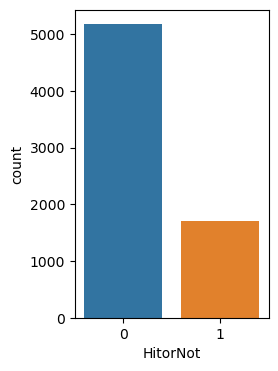

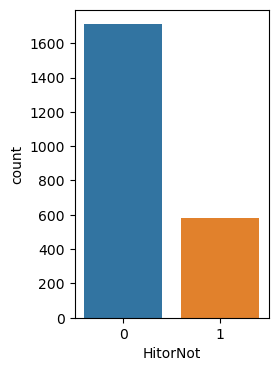

In [19]:
def makeCountPlot(data, width=0, height=4, hue=None):
  if width == 0:
    width = len(data.unique())*1.25
  plt.figure(figsize=(width, height))
  sns.countplot(x=data, hue=hue)
makeCountPlot(data=y_train)
makeCountPlot(data=y_test)

Importing the Random Forest Classifier.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#model = GaussianNB()
#model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=1400, max_depth=500, max_features=None)

Training the model to our training data


In [21]:
model.fit(x_train, y_train) #this cell takes 1.5 minutes to run

RandomForestClassifier(max_depth=500, max_features=None, n_estimators=1400)

Observing our predicted values on a classification report.

In [22]:
pred = model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1768
           1       0.70      0.77      0.73       523

    accuracy                           0.87      2291
   macro avg       0.81      0.84      0.82      2291
weighted avg       0.88      0.87      0.87      2291



We observe an accuracy of 87% on our model. A precision of 93% on "Non hit tracks" and 70% on "Hit tracks".

# Objective 4

In [48]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
# Data Loading and Cleaning
# Load the Spotify dataset and perform initial data cleaning
f = pd.read_csv("Spotify_Dataset_VA3.csv",delimiter=";")
f.drop(["# of Artist", "# of Nationality", "Points (Total)", "Points (Ind for each Artist/Nat)"], axis=1, inplace=True)

In [50]:
# Playlist Generation Function
def generate_custom_playlist(min_danceability, max_danceability, min_energy, max_energy, min_valence, max_valence, min_acousticness, max_acousticness, playlist_size, selected_year):
    # Convert 'Date' column to datetime format
    f['Date'] = pd.to_datetime(f['Date'], format='%d/%m/%Y')

    # Filter the dataset based on user-input criteria
    playlist = f[(f['Date'].dt.year == selected_year) & (f['Danceability'] >= min_danceability) & (f['Danceability'] <= max_danceability) & (f['Energy'] >= min_energy) & (f['Energy'] <= max_energy) & (f['Valence'] >= min_valence) & (f['Valence'] <= max_valence) & (f['Acousticness'] >= min_acousticness) & (f['Acousticness'] <= max_acousticness)]

    # Generate a custom playlist based on the specified criteria
    if len(playlist) >= playlist_size:
        custom_playlist = playlist['Title'].unique()[:playlist_size]
        return custom_playlist, playlist[['Danceability', 'Energy', 'Valence', 'Acousticness']]
    else:
        custom_playlist = playlist['Title'].unique()
        return custom_playlist, playlist[['Danceability', 'Energy', 'Valence', 'Acousticness']]

In [51]:
# User Input
# Take user input for defining the criteria of the custom playlist
min_danceability = float(input("Enter minimum Danceability: "))
max_danceability = float(input("Enter maximum Danceability: "))
min_energy = float(input("Enter minimum Energy: "))
max_energy = float(input("Enter maximum Energy: "))
min_valence = float(input("Enter minimum Valence: "))
max_valence = float(input("Enter maximum Valence: "))
min_acousticness = float(input("Enter minimum Acousticness: "))
max_acousticness = float(input("Enter maximum Acousticness: "))
playlist_size = int(input("Enter the number of songs in your custom playlist: "))
selected_year = int(input("Enter the year for filtering the dataset: "))

Enter minimum Danceability: 0.5
Enter maximum Danceability: 0.8
Enter minimum Energy: 0.4
Enter maximum Energy: 0.7
Enter minimum Valence: 0.4
Enter maximum Valence: 0.8
Enter minimum Acousticness: 0.2
Enter maximum Acousticness: 0.6
Enter the number of songs in your custom playlist: 12
Enter the year for filtering the dataset: 2023


In [52]:
# Playlist Generation
# Generate the custom playlist based on user input
custom_playlist, playlist_data = generate_custom_playlist(min_danceability, max_danceability, min_energy, max_energy, min_valence, max_valence, min_acousticness, max_acousticness, playlist_size, selected_year)

In [53]:
# Display Custom Playlist
# Display the generated custom playlist
print("\nCustom Playlist:")
if custom_playlist.size > 0:
    for song in custom_playlist:
        print(song)
else:
    print("No songs meet the specified criteria.")


Custom Playlist:
Cupid - Twin Ver.
Die For You (with Ariana Grande) - Remix
See You Again (feat. Kali Uchis)
People
Shakira: Bzrp Music Sessions, Vol. 53
cardigan
Heat Waves
No Role Modelz
Bebe Dame
Phir Aur Kya Chahiye (From "Zara Hatke Zara Bachke")
Stargirl Interlude
En Paris


# Project outcome

## Overview of Results 

We have managed to complete all of our objectives with ease and with satisfaction. We have provided insightful visualizations which are sure to bring about a stir to the average music enthusiast.

The modeling section of our project has many use cases to various sects of musicians, primarily to artists, who want to find if their unreleased track has what it takes to reach Spotify’s Top 200.  Further applications of our project lie in the hands of record labels and distributors, who would want to know what music is well liked in a certain region of the world. Any music lover can also make use of our model to explore genres and various other styles of music which wouldn’t otherwise come to mind. 

We provide the user with a summary of the music industry that year. It explained which songs and artists popular, how different features had an impact on a song’s ratings and what the general “vibe” of the year was. The user can also curate multiple playlists of their own by imposing a specific set of features. 


## Objective 1

## Explanation of Results

Heatmap Analysis:

* There doesn't see to be a linear link between Energy and rank because their correlation coefficient is nearly 0. 

* The negative correlation coefficient between rank and loudness suggests that there is a remote possibility that when loudness decreases, rank could rise significantly. 

* There doesn't seem to be a linear relationship between speechiness and rank despite the correlation coefficient between them showing a positive, weak association that is nearly zero. 

* The only correlation coefficient that shows a little greater positive connection than the others is between Acousticness and rank. This suggest that when a song's acousticness rises, it's rank may also slightly rise.

* Additionally, there is a -0.026 correlation coefficient between valence and rank, suggesting that when a song's valence (or positivity) declines , it's rank may marginally rise. 

Plot Analysis for Hexbin: 

Since Danceability and Acousticness have the least positive and negative correlations. I want to visualise these two varaibles using Rank. A collection of data points is represented by each heaxagon in the plot,   
and the density of points is represented by each hexagon in the plot, and the density of points is shown by colour variations in the plot. To univariate distribution of each attribute (Loudness and acousticness) along the appropriate axis is shown by the plots on the top sidebar and right sidebar. 

In the main hexbin plot for Rank and Acousticness, on the far right of hexbin plot you could see more darker colours, it means the songs with high Acousticness are more likely to have lower ranks. The lighter colours on the left side of hexbin main plot indicates that songs with lower Acousticness tend to have higher ranks. As for Top sidebar plot, the elevated bar suggest that there is a higher frequency of songs with lower Acousticness values. 

In the main hexbin plot for Danceability and rank , on the far right and far left of hexbin plot you could see more darker colours, it means the songs with higher danceability values more likely to have lower ranks and vice versa. The lighter colours on the middle right portion of hexbin main plot indicates that songs with moderate danceability tend to have diverse range of ranks. As for Top sidebar plot, the elevated bar suggest that there is a higher frequency of songs with higher danceability values.

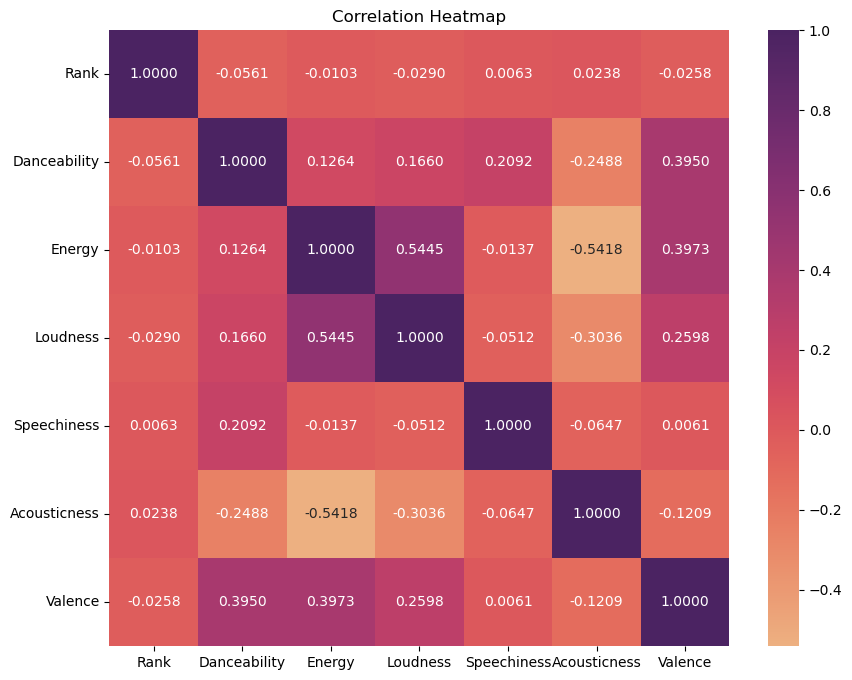

In [72]:
#defining a scatter and heat map for the better visulaization of the correlation coefficient
#Visualising data helps us in understanding patterns and relationships.

def correlation_heatmap(cds2):
    correlation_matrix = cds2.corr()
    plt.figure(figsize =(10,8))
    sns.heatmap(correlation_matrix, annot = True , cmap= 'flare', fmt='.4f')
    plt.title("Correlation Heatmap")
    plt.show()
    


correlation_columns = ['Rank','Danceability','Energy','Loudness','Speechiness','Acousticness','Valence']
correlation_heatmap(csd2[correlation_columns])

<Figure size 1000x800 with 0 Axes>

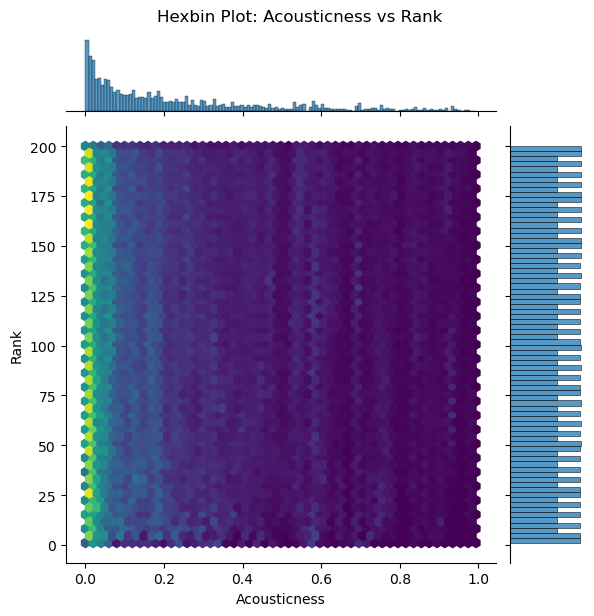

<Figure size 1000x800 with 0 Axes>

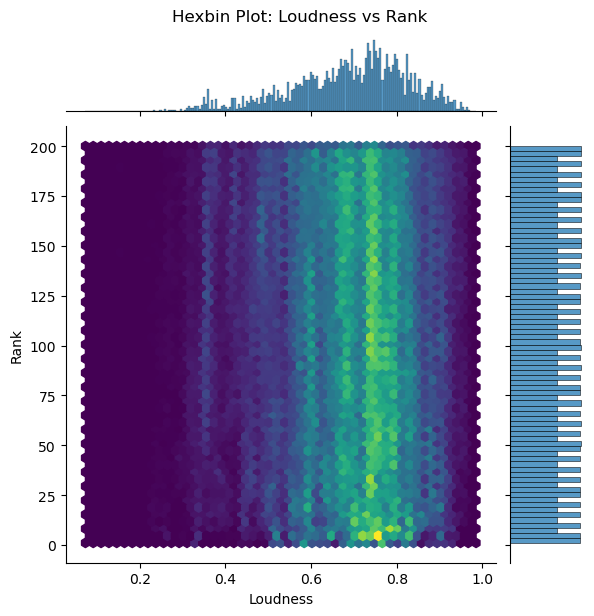

In [71]:
def hexbin_plot(csd2, xv, yv, title="", xlabel="", ylabel="", cmap="viridis", figsize=(10, 8)):
    plt.figure(figsize=figsize)
    joint_plot = sns.jointplot(csd2, x=xv, y=yv, kind='hex', cmap=cmap)
    joint_plot.set_axis_labels(xlabel, ylabel)
    joint_plot.fig.suptitle(title, y=1.02)
    plt.show()
hexbin_plot(csd2, xv="Acousticness", yv="Rank", title="Hexbin Plot: Acousticness vs Rank", xlabel="Acousticness", ylabel="Rank")
hexbin_plot(csd2, xv="Danceability", yv="Rank", title="Hexbin Plot: Loudness vs Rank", xlabel="Loudness", ylabel = "Rank")

## Objective 2

### Explanation of Results

* If the year inputted by the user is "2018", the following function should give the top 10 songs of the year 2018. The table for 2018 contains three songs that simultaneously stayed in the Top 200 for 365 days (the highest a song can stay in the Top 200 in a year, unless it's a leap year). Thus the statement includes "Believer by Imagine Dragons", "Jocelyn Flores by XXXTENTACION" and "Shape of You by Ed Sheeran", and says all three stayed for 365 days as the table says.

* If the year inputted by the user is "2018", the following function should give the top 10 artists of the year 2018. The table for 2018 had one artist that had the highest count, which was XXXTENTACION who appeared 2747 times in the Top 200 playlist for various songs, and this was summarised by the statement as well.

* The code cell below is used for creating filters to categorise tracks of that year as "High", "Medium" and "Low" based on popularity and feature given by user. We used the describe() feature to see the minimum and maximum values of each feature, and split them equally to create 3 intervals, the lowest of which were categorised as "Low, the middle as "Medium" and the higher interval as "High".

* Following code cell was used for creating a pivot table to show the user the distribution of songs based on popularity and feature that year, and creating a custom playlist having popular tracks having high feature. The function below returns a pivot table that shows that among the songs that had high energy, 19 songs had high popularity, 2 songs had low popularity, and 31 songs had medium popularity. Whereas among the songs that had low energy, 709 songs had high popularity, 131 songs had low popularity, and 829 songs had medium popularity. Whereas among the songs that had medium energy, 81 songs had high popularity, 4 songs had low popularity, and 51 songs had medium popularity. The function also returns a curated playlist for the user containing the 19 songs that had high popularity, as well as high energy. 

Visualization 1: The following visualization represents the table above in the form of a bar chart. For a better viewing experience, we have changed the limits of the y-axis, since most of the values of the number of days in the table exist in a small range. So instead of a range of 365, we changed the range to 360 - 367, to be able to visualize the data better. We can infer from the bar chart that multiple songs simultaneously stayed in the Top 200 for the same number of days with "Believer by Imagine Dragons", "Jocelyn Flores by XXXTENTACION" and "Shape of You by Ed Sheeran" with the highest possible number and every song after apart from the last song to make the list also stayed in the Top 200 for the same number of says, i.e. 363 days. Thus we can say that there were multiple hits thoughout the year. 



Here are the top 10 songs of the year:


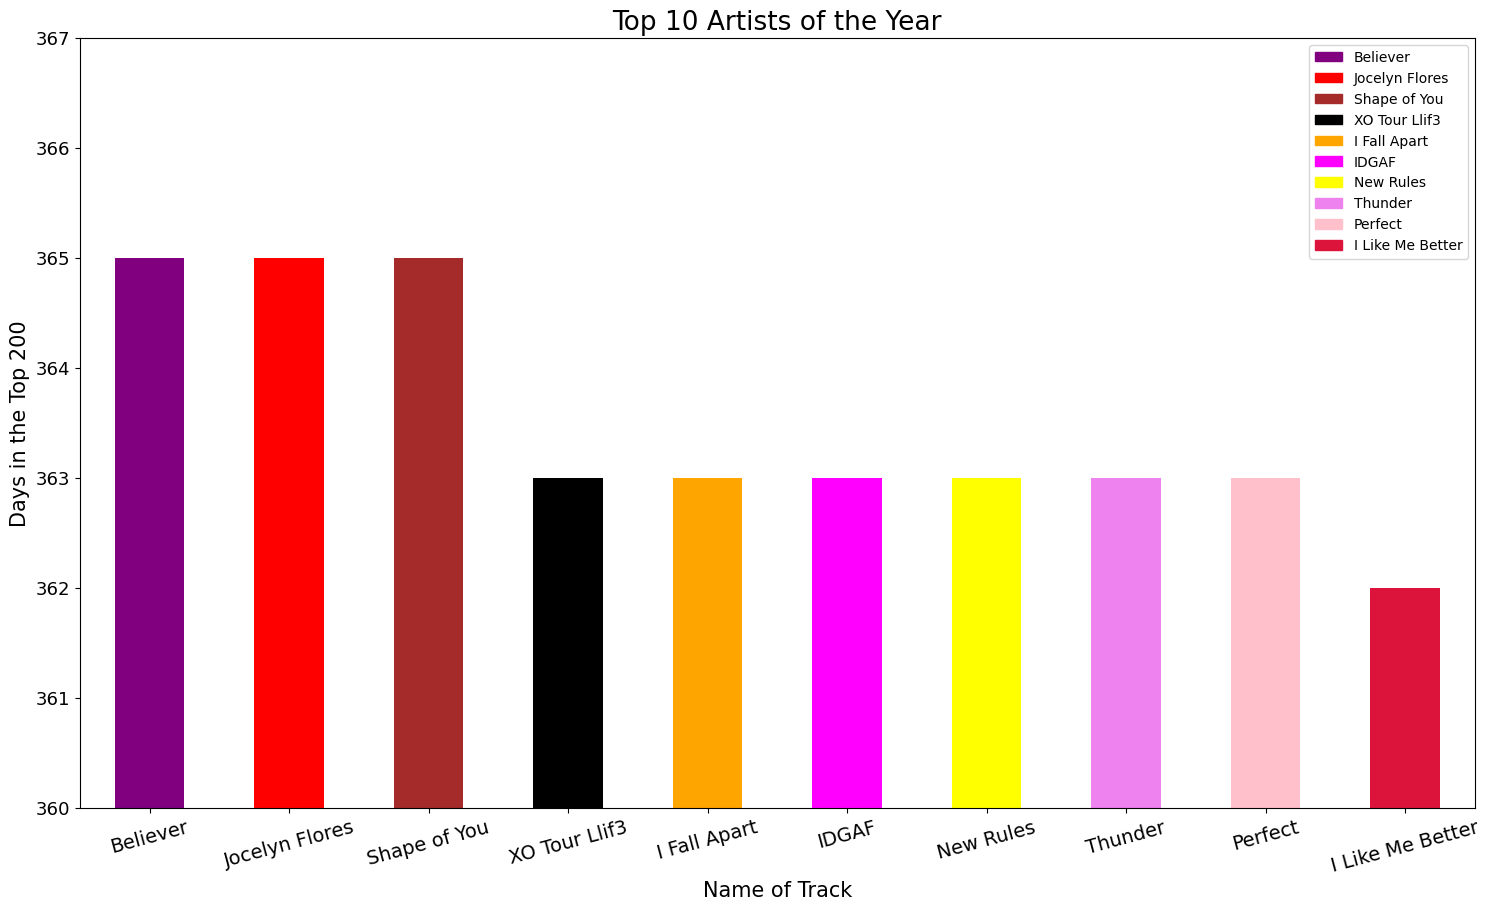

In [69]:
def songs_vis():
    plotmin1=min(maxsongs_frame["Days in Top 200"]) #The lowest value in the y-axis
    plotmax1=int(maxsongs_frame.loc[0].at["Days in Top 200"]) #The highest value in the y-axis
    color = ["purple", "red", "brown","black","orange","magenta","yellow","violet","pink","crimson"]
    y1=[]
    for i in maxsongs_frame.values.tolist():
        y1.append(i[0])
    print("Here are the top 10 songs of the year:")
    maxsongs_frame.plot.bar(x="Title", y="Days in Top 200", rot=15,fontsize=13,ylim=(plotmin1-2,plotmax1+2),figsize=(18,10),legend=True,color=color)
    plt.title("Top 10 Artists of the Year", fontdict={"fontsize":19})
    plt.xlabel("Name of Track", fontsize=15)
    plt.ylabel("Days in the Top 200", fontsize=15)
    plt.xticks(fontsize=14)        
    labels=y1 #legends
    handles=[plt.Rectangle((0,0),1,1, color=color[labels.index(label)]) for label in labels]
    plt.legend(handles, labels)
    plt.show()
songs_vis()

Visualization 2: The following visualization represents the table above in the form of a pie chart. The pie chart is able to represent what portion of the Top 200 playlist, an artist from the Top 10 Artists table holds. We can infer from the pie chart that XXXTENTACION held the majority of the spots, i.e. almost 1/5th of all the spots in the Top 200 playlist among the 10 artists only,with Post Malone coming in at a close second, while Ariana Grande and Eminem held the smallest portions among the Top 10 artists. 

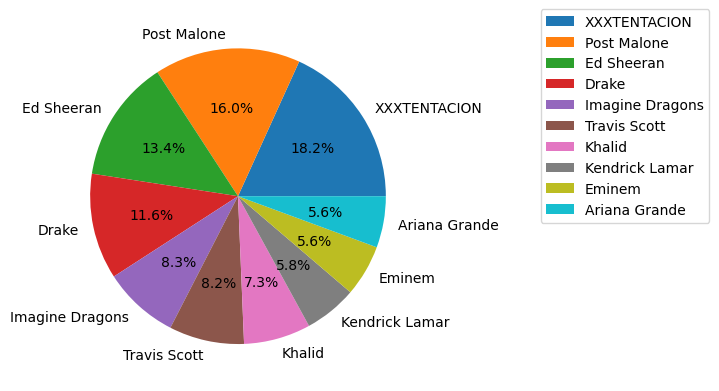

In [73]:
def artists_vis():
    y2=[]
    for i in maxartists_frame.values.tolist():
        y2.append(i[0]) #legend
    plt.pie(list_frame["Artists"].value_counts().head(10), labels=y2,autopct="%.1f%%")
    plt.legend(bbox_to_anchor=(1.3,1.025), loc="upper left")
    plt.ylabel("")
    plt.show()
artists_vis()

Visualization 3: The heatmap below is supposed to visually represent the pivot table shown above. We can see from the heatmap that the majority of songs having high (709 songs) or medium (829 songs) energy levels are shown to have the lowest popularity, while songs having the least amount of energy had the medium (4 songs) and high (2 songs) popularity. However, we cannot say that the energy and popularity are completely inversely proportional. We can see that the majority of the highest popular songs have a medium level of energy as opposed to the lowest level of energy. Thus, we can infer from the heatmap below that high energy songs tend to have lower popularity, but some level of energy is required to make a song popular.

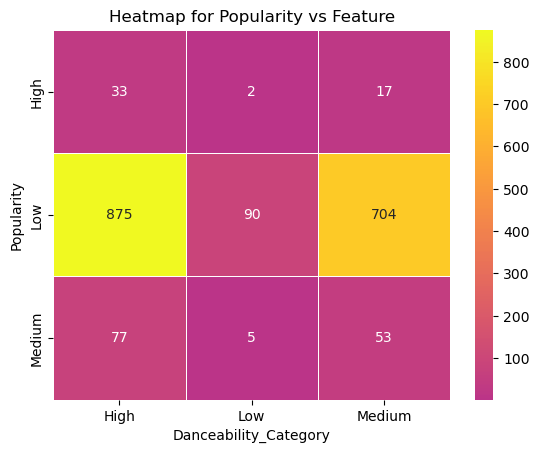

In [74]:
def popular_vis():
    plt.title("Heatmap for Popularity vs Feature")
    ax = sns.heatmap(v, annot=True, cmap="plasma",linewidth=0.5,center=100, fmt="g")
    plt.show()
popular_vis()


# Objective 3 


### Explanation of results

With the help of the RandomForestClassifier, we achieved an accuracy score of 87 percent overall; which is good considering the fact that none of the features except for MinRank, MaxRank and AvgRank have a correlation with HitOrNot of over 0.1 of magnitude. This shows that a hit song can come out of any genre, of any variety of features; which is good for the music scene all over the world. It shows that people are accepting of all genres and styles and in truth, the factors that really contribute to the popularity of a song could be factors outside of the ones discussed in this dataset. “Quality”, “Level of Advertisement”, “Type of Message” could be some of those factors. 

This however does not imply that the model will not work at all without the presence of rank features as even without them, there is a  consistency of attributes within the songs with which the Classification model can still function. Some notable examples are ones such as the high correlation between energy and loudness and the high negative correlation between acousticness and energy. 

With 75% of our test data being “NonHit” songs, it shows why the precision of predicting “NonHit” songs is 93% while the precision of predicting “Hit” songs is 70%. With more hit songs in the dataset, or reduction of the threshold value of the number of days by which a song is considered a “HitSong” is reduced, we can improve this precision. 
Lastly, we can see from the Confusion Matrix, the exact number of elements that were correctly and incorrectly predicted. Out of a set of 2291 test predictors, 176 songs that are “NotAHit” out of 1768  were predicted incorrectly and 118 songs that are “Hit” songs out of 523 were predicted incorrectly.




_We visualize the classification report in the form of a confusion matrix._

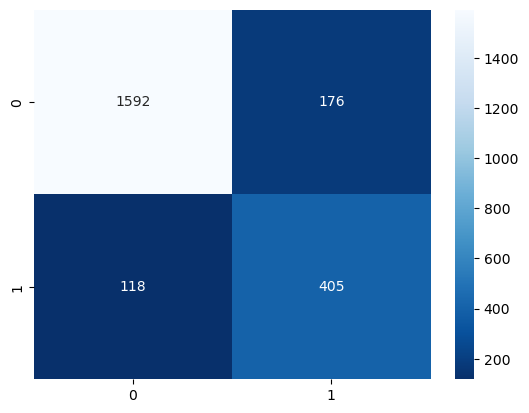

In [24]:
def CONFUSIONMATRIX():
    sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='Blues_r',fmt = "g")
CONFUSIONMATRIX()

We visualize the correlation matrix in the form of a heatmap.

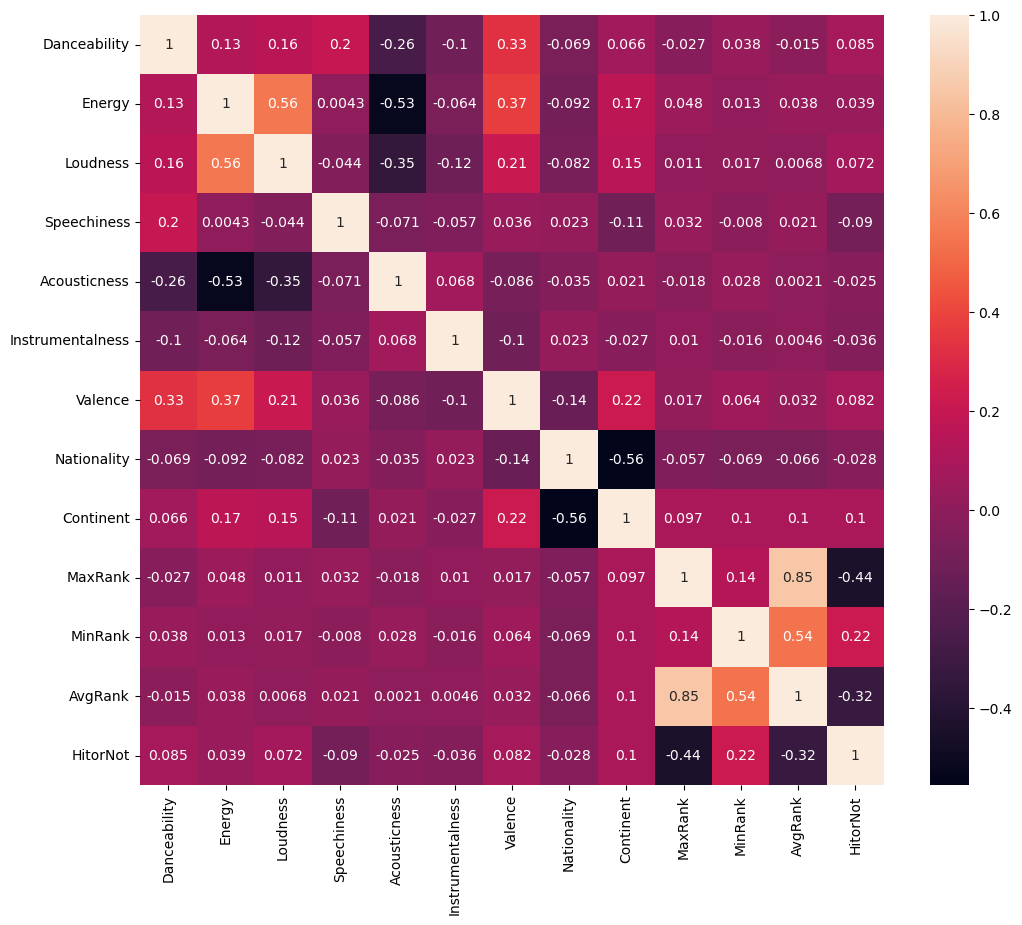

In [25]:
def HEATMAP():
    sdf = df.drop(['DaysinTop200','Start_Date','Last_Date',],axis =1,inplace = False)
    plt.figure(figsize=(12, 10)) # Set the figure size
    sns.heatmap(sdf.corr(), annot=True) # Print the heatmap
HEATMAP()

# Objective 4


### Explanation of Results

The user is prompted to input minimum and maximum values for danceability, energy, valence, and acousticness, along with playlist size and the desired year for filtering the dataset.The audio attributes (danceability, energy, valence, and acousticness) are chosen to best customize the user playlist and minimizing the number of user input values for a better user experience.The generate_custom_playlist function takes these inputs, filters the Spotify dataset based on the specified criteria, and generates a custom playlist with corresponding audio attribute data.

Based on the user input the custom playlist generated: 
Custom Playlist:
Cupid - Twin Ver.
Die For You (with Ariana Grande) - Remix
See You Again (feat. Kali Uchis)
People
Shakira: Bzrp Music Sessions, Vol. 53
cardigan
Heat Waves
No Role Modelz
Bebe Dame
Phir Aur Kya Chahiye (From "Zara Hatke Zara Bachke")
Stargirl Interlude
En Paris

From the bar chart we can interpret which songs posses a higher danceability score such as songs like "Cupid - Twin Ver.," "Shakira: Bzrp Music Sessions," and "Heat Waves" exhibit moderate to high danceability. While songs like "People and "Phir Aur Kya Chahiye (From "Zara Hatke Zara Bachke")" exhibit higher degrees of acousticness.The chart enables a quick comparison, allowing users to identify patterns and preferences in the playlist.

From the correlation heatmap the correlation coefficient of 0.36 suggests a moderate positive correlation between danceability and valence. This indicates that songs with higher danceability scores tend to have a more positive emotional tone. And correlation coefficient of -0.0021 suggests a very weak or almost negligible negative correlation between danceability and energy, there's no clear trend indicating that more danceable songs are consistently associated with higher or lower energy levels.And the Valence & Energy correlation coefficient of 0.052 indicates a very weak positive correlation between valence (positiveness) and energy, theres slight tendency for songs with higher energy levels to have a more positive emotional tone, but the correlation is not strong.

The bubble chart visually represents danceability, energy, and valence for each song in the playlist. Larger bubbles indicate higher valence, providing insights into the emotional tone of each track. "Shakira: Bzrp Music Sessions, Vol. 53" has a high danceability and eneergy in comparison to other songs within the playlist but has a comparatively low valence score. While the song "people" has a lower danceability and energy but has a higher bubble size indicating a high valence, making it a potentially more uplifting and positive song in the playlist. 

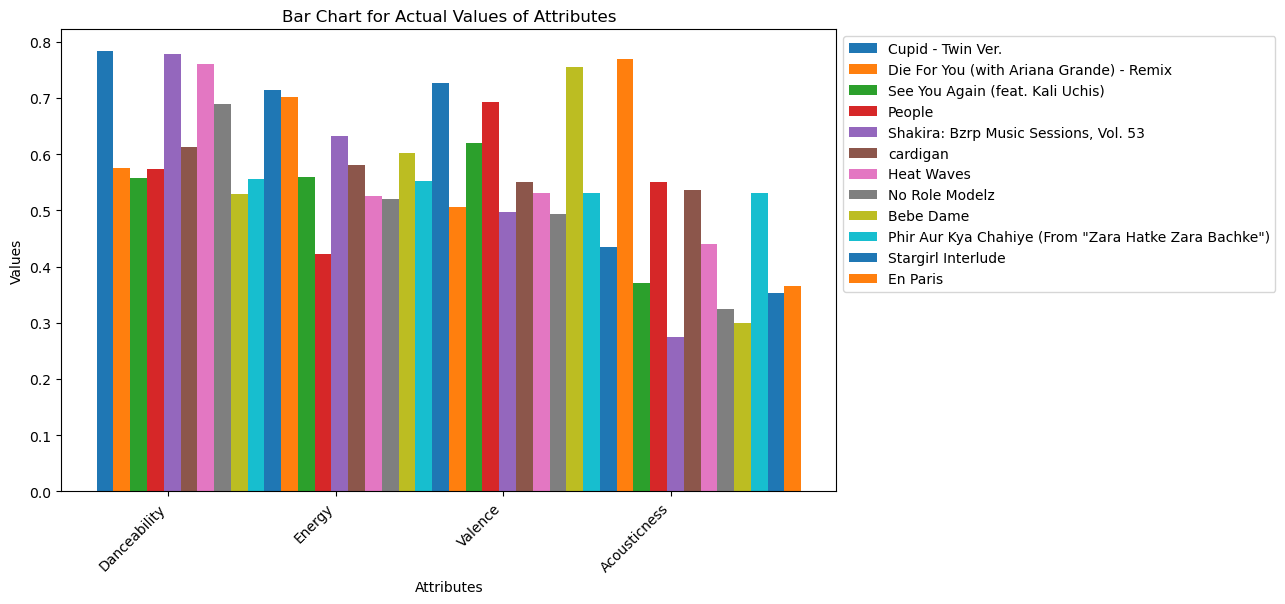

In [78]:
# Bar Chart for Actual Values
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_spacing = 0.3  

num_attributes = len(playlist_data.columns)
total_width = num_attributes * bar_width + (num_attributes - 1) * bar_spacing
bar_positions = np.arange(num_attributes) * (total_width + bar_spacing)

for i, song in enumerate(custom_playlist):
    song_data = playlist_data[playlist_data.index.isin(f.index[f['Title'] == song])]
    
    plt.bar(
        bar_positions + i * bar_width,
        song_data.iloc[0],
        width=bar_width,
        label=song
    )

plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Bar Chart for Actual Values of Attributes')
plt.xticks(bar_positions + (total_width - bar_width) / 2, playlist_data.columns, rotation=45, ha='right')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


#### _Bar Chart for Actual Values_

*  Generates a stacked bar chart to visually represent the actual values of danceability, energy, valence, and acousticness for each song in the custom playlist.

*  This chart provides a comparative view of audio attributes across different songs.


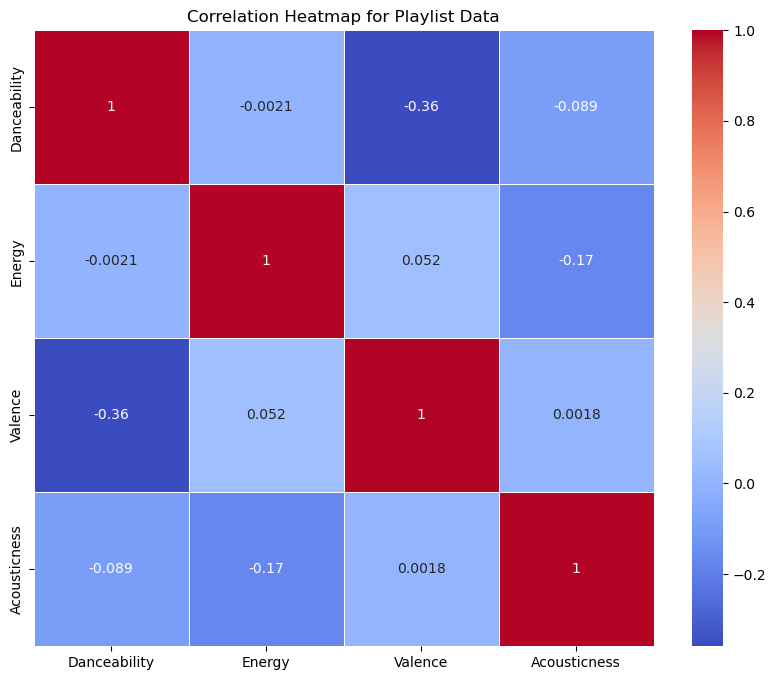

In [79]:
#Correlation Heatmap
correlation_matrix = playlist_data.corr()


plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title('Correlation Heatmap for Playlist Data')
plt.show()


#### _Correlation Heatmap_

* Generates a heatmap illustrating the correlation between different audio attributes in the custom playlist.

* This heatmap helps identify patterns and relationships between attributes.

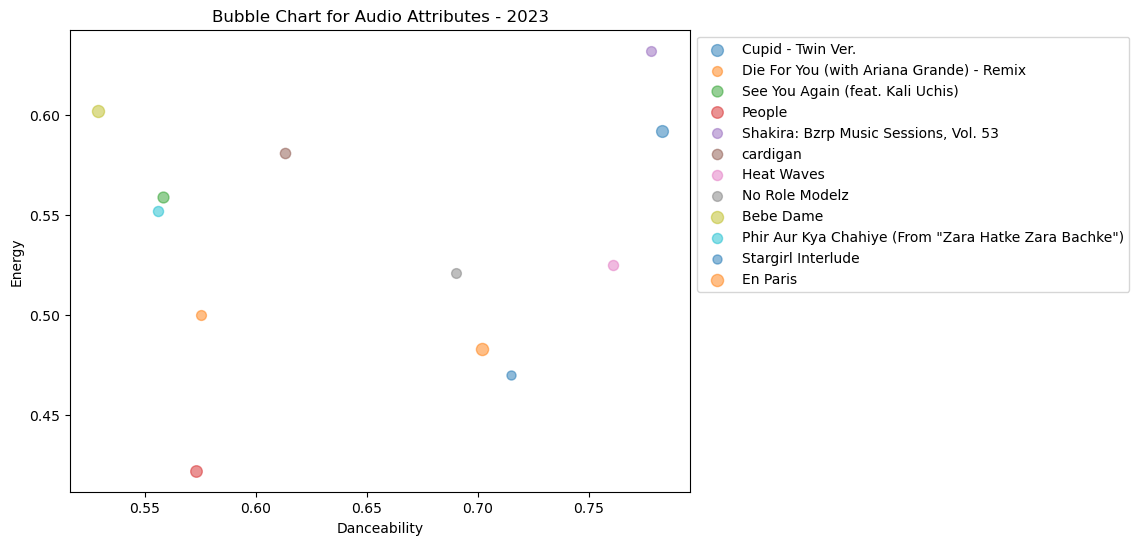

In [80]:
#Bubble Chart for Audio Attributes
plt.figure(figsize=(8, 6))
for song in custom_playlist:
    song_data = playlist_data[playlist_data.index.isin(f.index[f['Title'] == song])]
    plt.scatter(
        song_data['Danceability'].values[0],
        song_data['Energy'].values[0],
        s=song_data['Valence'].values[0] * 100,  # Bubble size based on Valence
        alpha=0.5,
        label=song
    )
    
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title(f'Bubble Chart for Audio Attributes - {selected_year}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 


plt.show()


#### Bubble Chart for Audio Attributes

* Generates a bubble chart to visualize the relationship between danceability, energy, and valence for each song in the custom playlist.

* Bubble size is based on valence, providing an additional layer of information.


# Conclusion 

In conclusion, our project works around a comprehensive analysis of the Spotify Top 200 playlist dataset, aiming to provide insights and trends within our music dataset. Through various analytical tools and models, we've explored the inter-correlations between different song features and their impact on playlist rankings. An artist who is relatively new to the music scene can gain insights on how his/her songs will rank on the world’s stage with the use of our classification model and likelihood measurements. We understood that the musical feature of the song only have a slight impact on the likelihood of the song reaching top 200. We also have successfully created a classification model which is capable of classifying songs based on their attributes whether they would be a hit or not. The outcomes underscore the diverse and distinctive nature of the personalized playlist, featuring a mix of songs with unique audio traits. The visual representations aid in grasping the overall structure of the playlist and the connections among its audio features. Users can interpret these findings to get more insights into the music preferences and trends embedded in the curated playlist.sers can derive insights into the diverse musical landscape and patterns present in the generated playlist, aiding in a deeper appreciation and understanding of their musical preferences.


## Achievements

Our project mimics the concept of "Spotify Wrapped," offering users catered analytics for the Top 200 playlist of any given year between 2017 and 2023. Users can explore the top songs and artists, visualize trends, and gain a summarized understanding of the music scene each year.We present a user-friendly feature where users can input a specific year and desired audio features to receive a custom playlist. This minimizes user input while maximizing the customization of the playlist, offering a more enjoyable and personalized music experience.We have achieved an accuracy of 86% percent on our RandomForestClassifer model which can be used by Artists, Music Labels and even other Music enthusiasts.

## Limitations
The low correlations of music features with whether the song is a “Hit” or not limits the performance of the model to a significant extent.
The scores provided for each song is done by another model which is in control of the provider of the dataset. If that model would be open source, other individuals can make use of this classification model more reliably as scores provided directly by individuals are very subjective.


## Future Work
With the availability of a greater number of features with a significant correlation to popularity, we can expect to go above a classification model and even create a reliable predictive model for a target variable “popularity”. In conjunction with another model which can extract the perfect features out of every song, we can expand our data repository and even create deep learning models which can give real time comparisons to current hit songs of similar genre and suggest impactful changes. 

